In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# Define the pricing environment
class PricingEnvironment:
    def __init__(self, max_price, costs):
        self.max_price = max_price
        self.costs = costs

    def get_profit(self, price, demand):
        revenue = price * demand
        cost = self.costs
        return revenue - cost

    def get_demand(self, price):
        return demand_fn(price)

In [3]:
# Define the reinforcement learning agent
class QLearningAgent:
    def __init__(self, actions):
        self.Q = {}
        self.actions = actions
        self.alpha = 0.2 #learning rate
        self.discount = 0.9
        self.epsilon = 0.1 #exploariton rate

    #returns the Q-value for that state-action pair
    def get_Q_value(self, state, action):
        if (state, action) not in self.Q:
            self.Q[(state, action)] = 0.0
        return self.Q[(state, action)]

    #returns an action using an epsilon-greedy policy
    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.choice(self.actions)
        else:
            values = [self.get_Q_value(state, a) for a in self.actions]
            max_value = max(values)
            if values.count(max_value) > 1:
                best_actions = [i for i in range(len(self.actions)) if values[i] == max_value]
                i = random.choice(best_actions)
            else:
                i = values.index(max_value)
            return self.actions[i]

    def update_Q_value(self, state, action, next_state, reward):
        old_value = self.get_Q_value(state, action)
        next_max = max([self.get_Q_value(next_state, a) for a in self.actions])
        new_value = (1 - self.alpha) * old_value + self.alpha * (reward + self.discount * next_max)
        self.Q[(state, action)] = new_value

In [4]:
# Define the demand function
def demand_fn(price):
    return 100 - price

# Define the cost
costs = 50

# Define the pricing environment
env = PricingEnvironment(100, costs)

# Define the reinforcement learning agent
agent = QLearningAgent(range(env.max_price + 1))

Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Demand: 100
Price: 54 Demand: 46
Price: 0 Dema

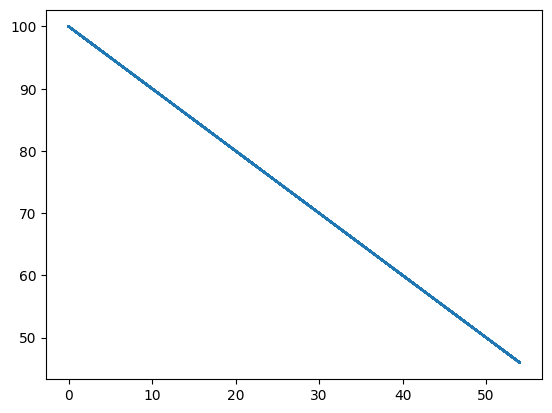

In [5]:
# Train the agent
num_episodes = 1000
for i in range(num_episodes):
    state = (env.get_demand(0), 0)
    for t in range(30):
        price = agent.choose_action(state)
        demand = env.get_demand(price)
        profit = env.get_profit(price, demand)
        next_state = (env.get_demand(price), min(price + 1, env.max_price))
        agent.update_Q_value(state, price, next_state, profit)
        state = next_state

prices = []
demands = []

# Test the agent
state = (env.get_demand(0), 0)
for t in range(50):
    price = max(agent.actions, key=lambda x: agent.get_Q_value(state, x))
    prices.append(price)
    demand = env.get_demand(price)
    demands.append(demand)
    print("Price:", price, "Demand:", demand)
    state = (demand, price)

plt.plot(prices,demands)

plt.xlabel = ('price')
plt.ylabel = ('demand')